In [1]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import scipy.stats as st

In [2]:
cameras_file = os.path.join("../Desktop/Archive", "red-light-camera-locations.csv")
speedings_file = os.path.join("../Desktop/Archive","speed-camera-violations.csv")

In [3]:
red_locs_df = pd.read_csv(cameras_file)
del red_locs_df["Third Approach"]
speedings_df = pd.read_csv(speedings_file)

In [4]:
cams_per_ward = pd.DataFrame(red_locs_df.groupby("Wards")["Intersection"].count())
cams_per_ward.head()

,Intersection
Wards,
1,2
2,2
3,2
4,1
5,1


In [5]:
violations_per_ward = pd.DataFrame(speedings_df.groupby("Wards")["Violations"].sum())
violations_per_ward.head()

,Violations
Wards,
1.0,133599
2.0,80740
3.0,76211
4.0,332224
6.0,24005


In [24]:
merge_df = pd.merge(cams_per_ward, violations_per_ward, on="Wards")
merge_df = merge_df.rename(columns={
    "Intersection": "Number of Red Light Cams per Ward",
    "Violations": "Number of Speeding Violations per Ward"
})
merge_df.head()

,Number of Red Light Cams per Ward,Number of Speeding Violations per Ward
Wards,,
1,2,133599
2,2,80740
3,2,76211
4,1,332224
6,1,24005


In [7]:
def to_linear_regress(x, y, weight, arrangement, cmap):
    pearson_r = round(st.pearsonr(x, y)[0],2)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept, 2)}"
    plt.scatter(x, y, s=weight, c=arrangement, cmap=cmap)
    plt.plot(x,regress_values,"r-")
    print(f"correlation coefficient : {pearson_r}")
    return line_eq

In [8]:
def to_annotate(line_eq, x, y):
    plt.annotate(line_eq,(x,y),fontsize=13,color="red")

correlation coefficient : 0.18


Text(0.5, 1.08, 'Number of Red-Light Cameras Per Ward vs.The Number of Speeding Violations in Chicago from 2014 - 2019')

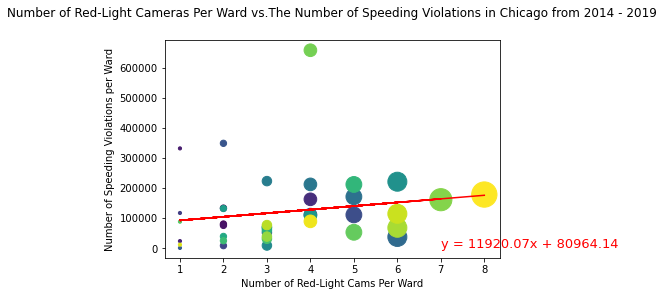

In [9]:
weight= 10 * (merge_df["Number of Red Light Cams per Ward"]**2)
arrangement=np.arange(len(merge_df["Number of Red Light Cams per Ward"]))
cmap='viridis'
line = to_linear_regress(merge_df["Number of Red Light Cams per Ward"], merge_df["Number of Speeding Violations per Ward"], weight, arrangement, cmap)
to_annotate(line, 7, 200)
plt.xlabel("Number of Red-Light Cams Per Ward")
plt.ylabel("Number of Speeding Violations per Ward")
plt.title("Number of Red-Light Cameras Per Ward vs.The Number of Speeding Violations in Chicago from 2014 - 2019", y=1.08)